In [2]:
import numpy as np
import pandas as pd

# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')


# We will display plots right inside Jupyter Notebook
%matplotlib inline
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [34]:
df=pd.read_csv("https://raw.githubusercontent.com/kurochkinam/mlcourse.ai/master/data/telecom_churn.csv")

In [4]:
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

## For quanty - hist & density plots, for qualy - countplot (barplot)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002459A9A6898>,
      dtype=object)

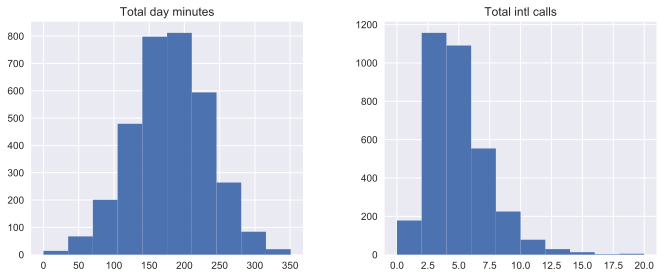

In [9]:
plt.style.use('seaborn')
features = ['Total day minutes', 'Total intl calls']
df.hist(features, figsize=(10,4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002459B12B400>,
      dtype=object)

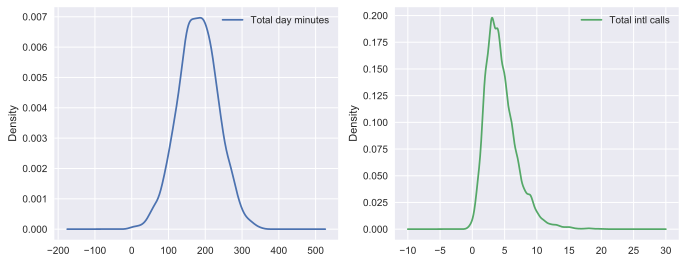

In [15]:
df[features].plot(kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4))

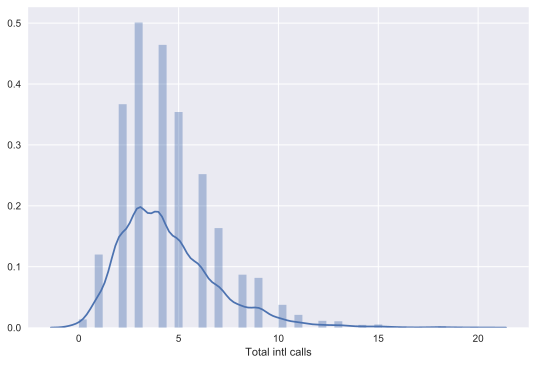

In [18]:
sns.distplot(df['Total intl calls'])

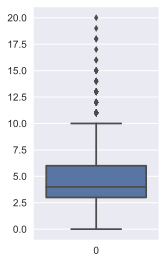

In [21]:
_, ax = plt.subplots(figsize=(2, 4))
sns.boxplot(data=df['Total intl calls'], ax=ax);

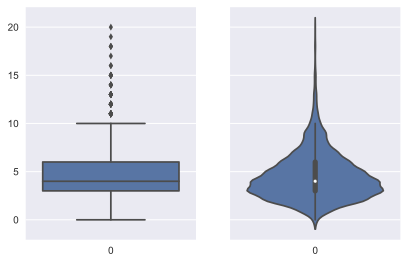

In [22]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['Total intl calls'], ax=axes[0]);
sns.violinplot(data=df['Total intl calls'], ax=axes[1]);

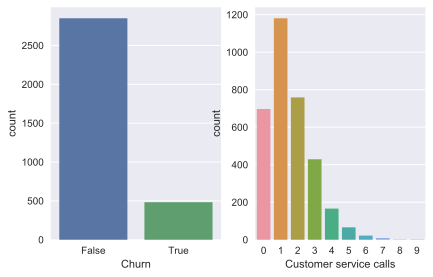

In [27]:
_,axes=plt.subplots(nrows=1, ncols=2, figsize=(6,4))

sns.countplot(x="Churn", data=df, ax=axes[0])
sns.countplot(x="Customer service calls", data=df, ax=axes[1])

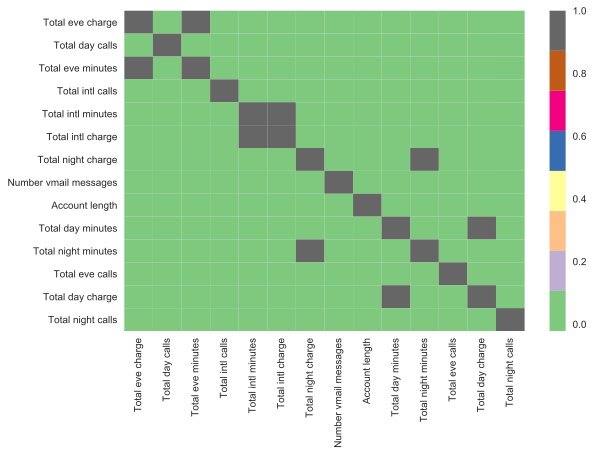

In [35]:
# Drop non-numerical variables
numerical = list(set(df.columns) - 
                 set(['State', 'International plan', 'Voice mail plan', 
                      'Area code', 'Churn', 'Customer service calls']))

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix, cmap="Accent");



In [36]:
numerical = list(set(numerical) - 
                 set(['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']))

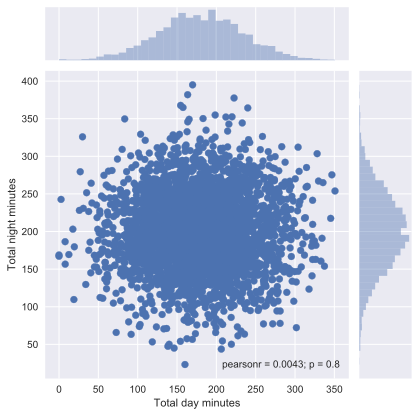

In [38]:
sns.jointplot(x='Total day minutes', y='Total night minutes', 
              data=df, kind='scatter');

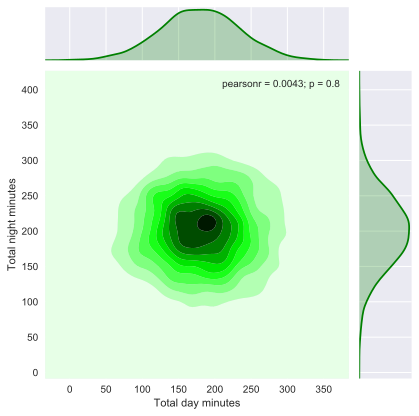

In [39]:
sns.jointplot('Total day minutes', 'Total night minutes', data=df,
              kind="kde", color="g");

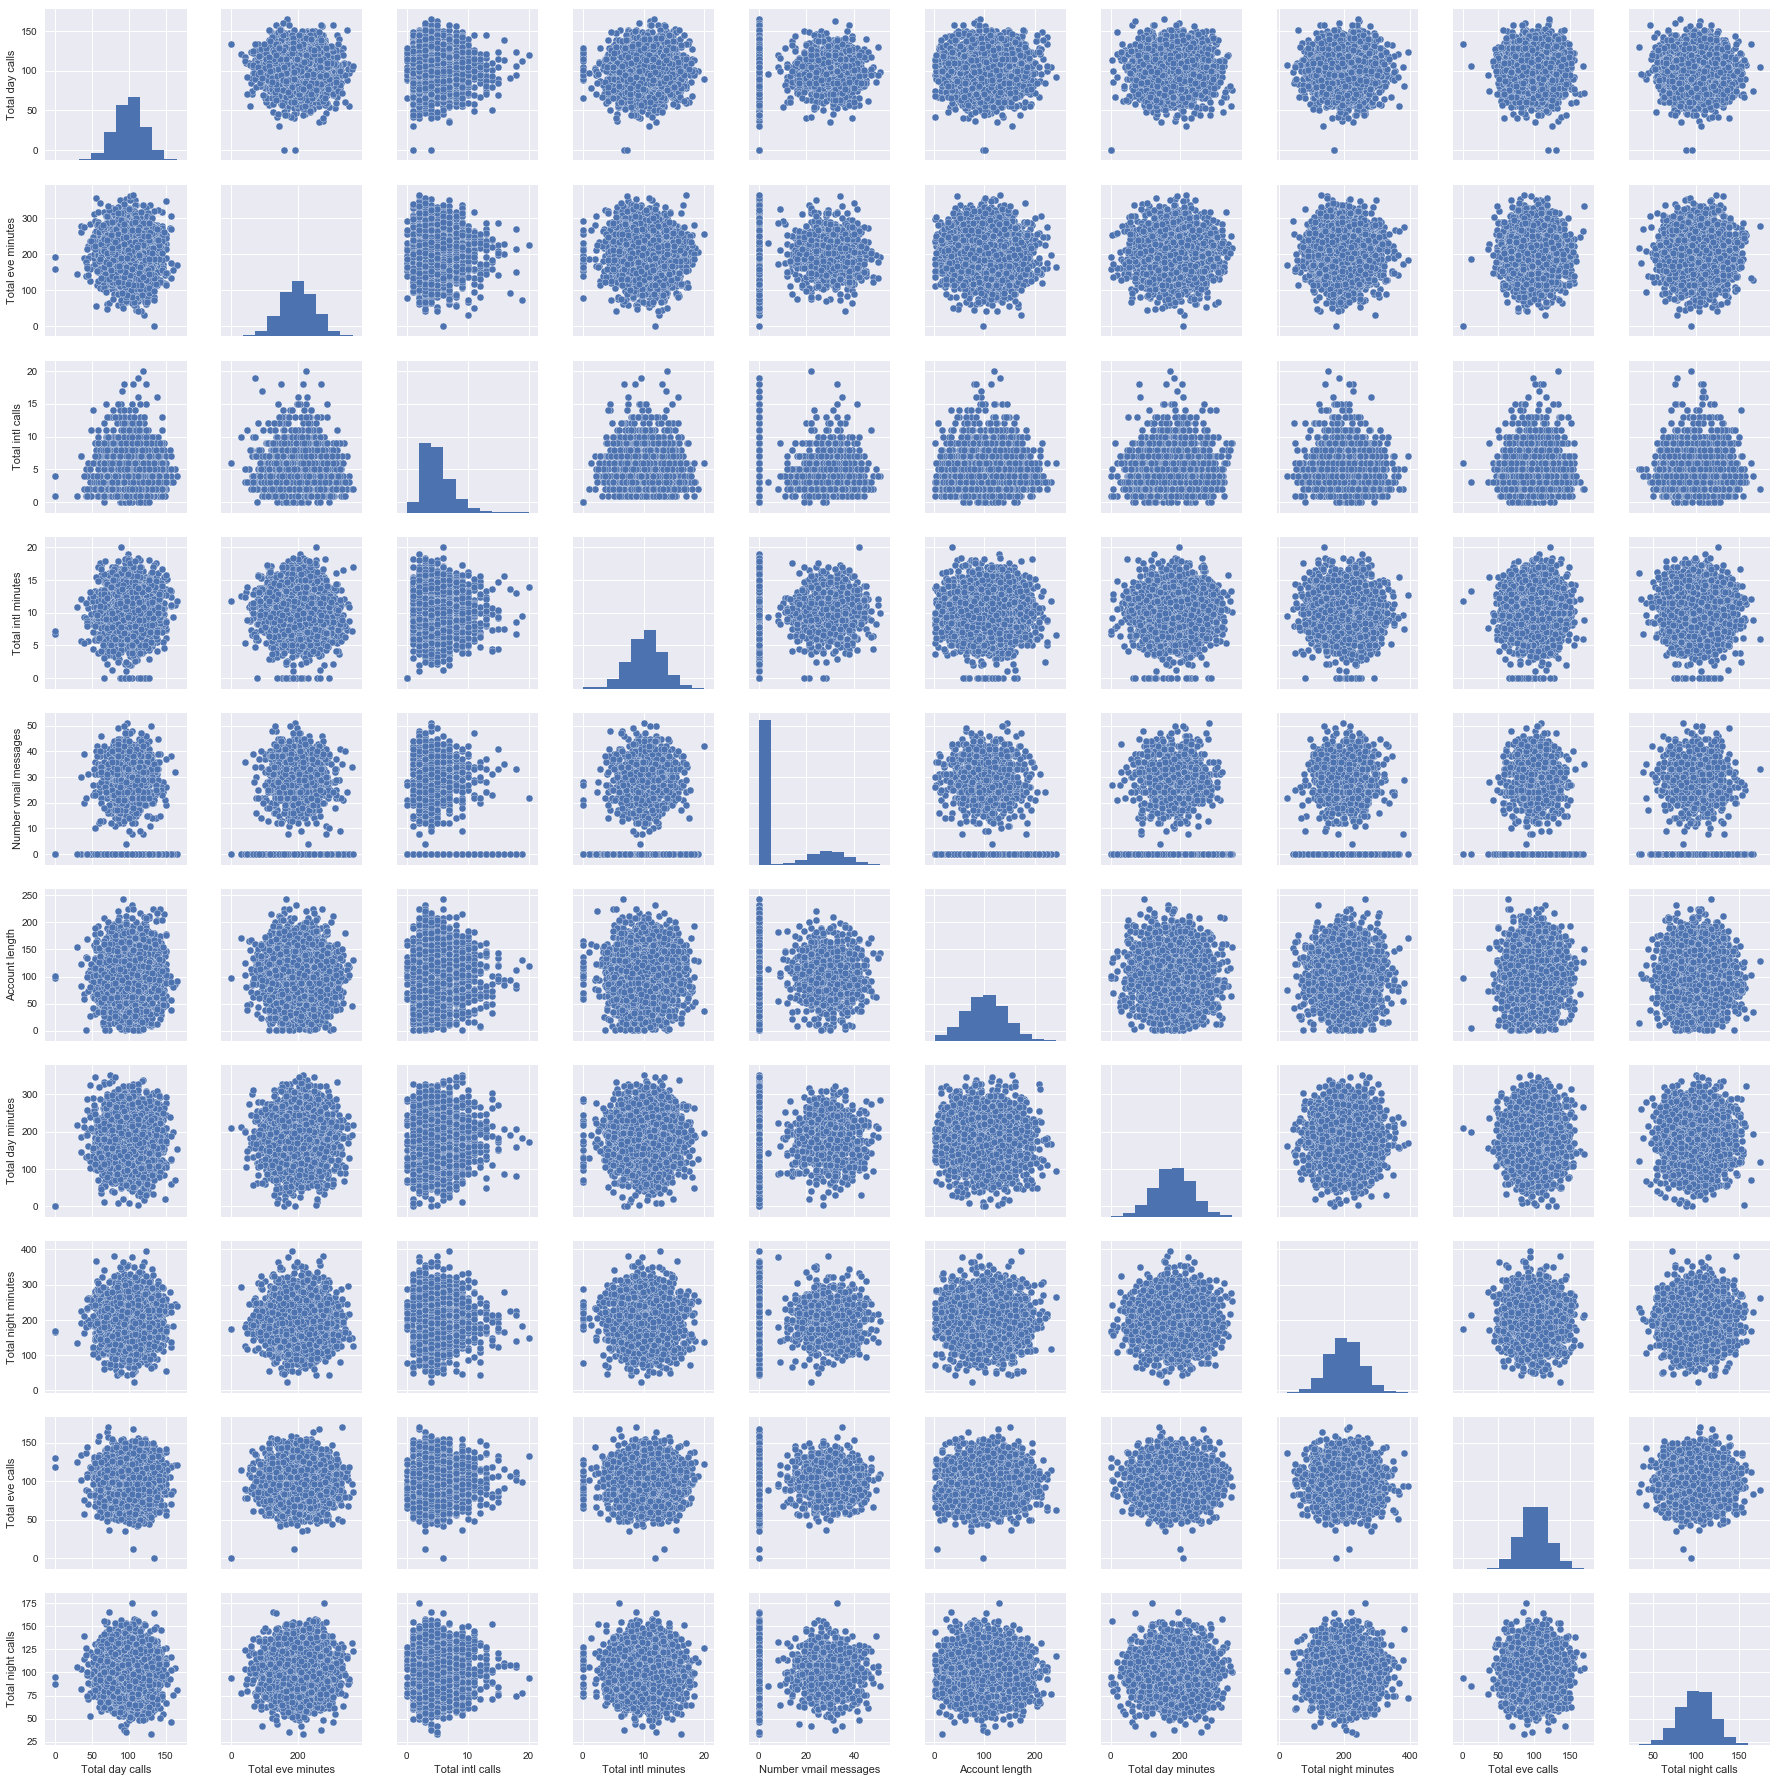

In [40]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

In [42]:

%config InlineBackend.figure_format = 'svg'

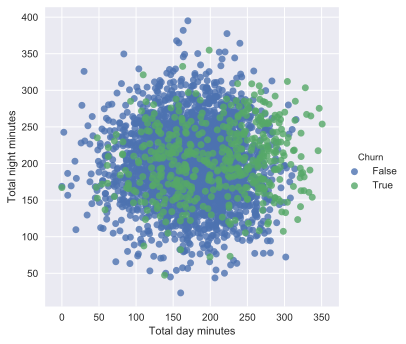

In [45]:
sns.lmplot('Total day minutes', 'Total night minutes', data=df, hue='Churn', fit_reg=False)

IndexError: index 3 is out of bounds for axis 0 with size 3

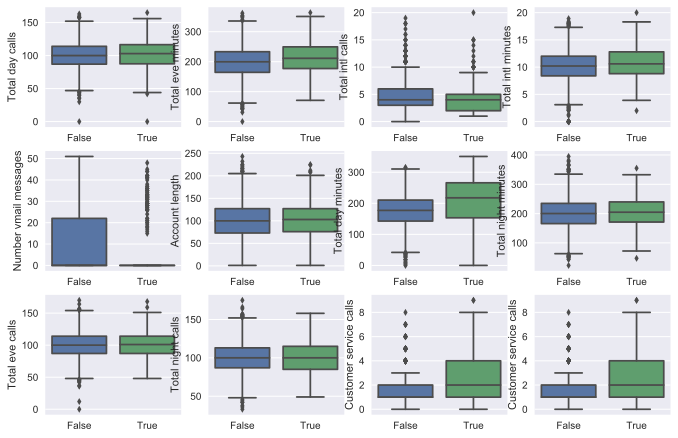

In [48]:
# Sometimes you can analyze an ordinal variable just as numerical one
numerical.append('Customer service calls')

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x='Churn', y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

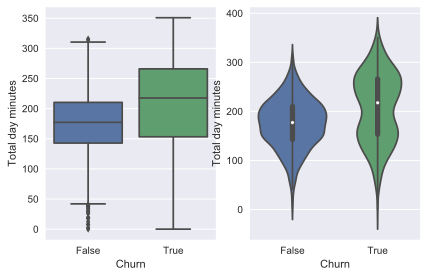

In [54]:
"""Let's look at the distribution of day minutes spoken for the loyal and disloyal customers separately.
We will create box and violin plots for Total day minutes grouped by the target variable."""

_, axes=plt.subplots(1,2,figsize=(6,4))
sns.boxplot(y="Total day minutes", x="Churn", data=df, ax=axes[0] )
sns.violinplot(y="Total day minutes", x="Churn", data=df, ax=axes[1] )

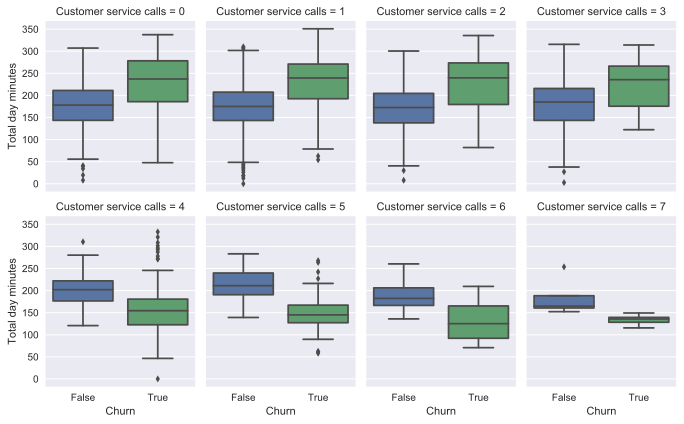

In [14]:
sns.factorplot(x="Churn", y="Total day minutes", col="Customer service calls", 
               data=df[df["Customer service calls"]<8], kind="box", col_wrap=4, size=3, aspect=.8)

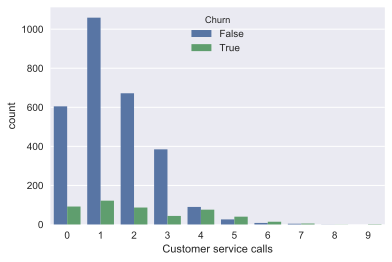

In [16]:
sns.countplot(x="Customer service calls", hue="Churn", data=df)

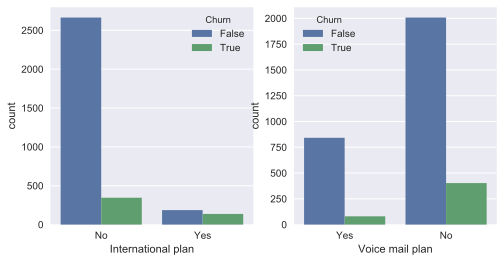

In [18]:
_, axes=plt.subplots(1, 2, figsize=(8,4), sharey=False)
sns.countplot(x='International plan', hue='Churn', data=df, ax=axes[0])
sns.countplot(x="Voice mail plan", hue="Churn", data=df, ax=axes[1])

In [19]:
pd.crosstab(df["Churn"], df["State"])

State  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL ...  SD  TN  TX  UT  VA  VT  WA  \
Churn                                         ...                               
False  49  72  44  60  25  57  62  49  52  55 ...  52  48  54  62  72  65  52   
True    3   8  11   4   9   9  12   5   9   8 ...   8   5  18  10   5   8  14   

State  WI  WV  WY  
Churn              
False  71  96  68  
True    7  10   9  

[2 rows x 51 columns]

In [25]:
# in agg [] to form a column "mean" and sort by its value
df.groupby("State")["Churn"].agg(["mean"]).sort_values("mean", ascending=False).T

State        NJ        CA    TX        MD        SC        MI        MS  \
mean   0.264706  0.264706  0.25  0.242857  0.233333  0.219178  0.215385   

State        NV        WA        ME    ...           RI        WI        IL  \
mean   0.212121  0.212121  0.209677    ...     0.092308  0.089744  0.086207   

State        NE        LA        IA        VA      AZ        AK        HI  
mean   0.081967  0.078431  0.068182  0.064935  0.0625  0.057692  0.056604  

[1 rows x 51 columns]

In [27]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [35]:
X=df.drop(["State", "Churn"], axis=1)

In [36]:
X["International plan"]=X["International plan"].map({"Yes": 1, "No": 0})
X["Voice mail plan"]=X["Voice mail plan"].map({"Yes": 1, "No": 0})

In [37]:
X.head()

Account length  Area code  International plan  Voice mail plan  \
0             128        415                   0                1   
1             107        415                   0                1   
2             137        415                   0                0   
3              84        408                   1                0   
4              75        415                   1                0   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  
0                       1  
1                       1  
2                       0  
3                       2  
4                       3

In [38]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [40]:
%%time
tsne_repres=TSNE(random_state=17)
result=tsne_repres.fit_transform(X_scaled)

Wall time: 1min 10s


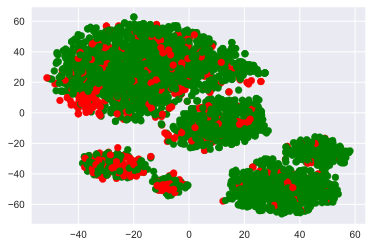

In [42]:
plt.scatter(result[:,0], result[:,1], c=df["Churn"].map({True:"red", False: "green"}))

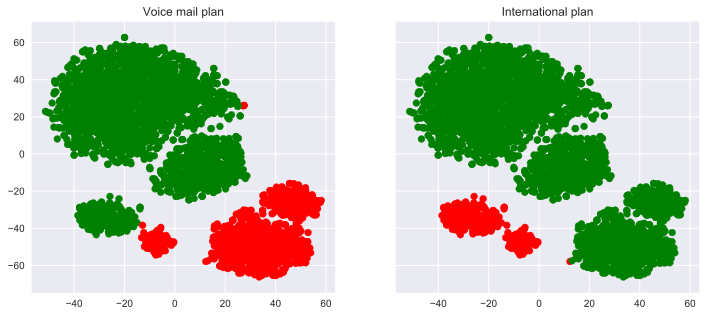

In [45]:
_, axes=plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(["Voice mail plan", "International plan"]):
    axes[i].scatter(result[:,0], result[:,1], c=df[name].map({"Yes":"red", "No": "green"}))
    axes[i].set_title(name)
